### Importing Libs 

In [13]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import plotly.express as px

from sklearn.ensemble import IsolationForest

import warnings 
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('nyc_taxi.csv')
df

,Unnamed: 0,timestamp,value
0,0,2014-07-01 00:00:00,10844
1,1,2014-07-01 00:30:00,8127
2,2,2014-07-01 01:00:00,6210
3,3,2014-07-01 01:30:00,4656
4,4,2014-07-01 02:00:00,3820
...,...,...,...
10315,10315,2015-01-31 21:30:00,24670
10316,10316,2015-01-31 22:00:00,25721
10317,10317,2015-01-31 22:30:00,27309
10318,10318,2015-01-31 23:00:00,26591


### Tratando os dados

In [16]:
#df.columns
df = df[['timestamp', 'value']]
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [18]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [19]:
# Reorganizando por Hora inteira
df = df.set_index('timestamp').resample("H").mean().reset_index()
df

,timestamp,value
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [23]:
# Plotando a distribuição a longo do tempo
fig = px.line(df.reset_index(), x = 'timestamp', y= 'value', title = 'NYC Taxi')

fig.update_xaxes(
    rangeslider_visible = True,) #Incluindo um slider
fig.show()

# Podemos ver que existe um padrão nos dados

In [37]:
df['hour'] = df.timestamp.dt.hour      # Criando coluna de hora
df['weekday'] = pd.Categorical(df.timestamp.dt.strftime('%A'),
                               categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']) #Incluindo dia da semana
df

,timestamp,value,hour,weekday
0,2014-07-01 00:00:00,9485.5,0,Tuesday
1,2014-07-01 01:00:00,5433.0,1,Tuesday
2,2014-07-01 02:00:00,3346.5,2,Tuesday
3,2014-07-01 03:00:00,2216.5,3,Tuesday
4,2014-07-01 04:00:00,2189.5,4,Tuesday
...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday
5156,2015-01-31 20:00:00,24138.0,20,Saturday
5157,2015-01-31 21:00:00,24194.5,21,Saturday
5158,2015-01-31 22:00:00,26515.0,22,Saturday


<AxesSubplot:xlabel='hour'>

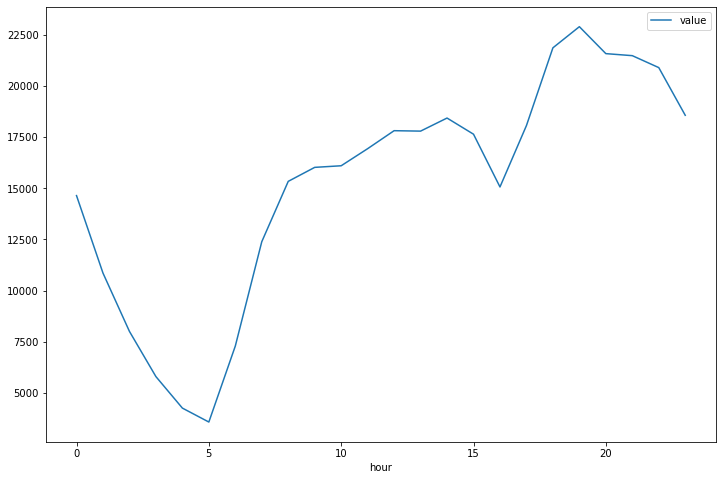

In [38]:
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['axes.grid'] = False

df[['value','hour']].groupby('hour').mean().plot() # Plotando a média por hora e vemos que o pico é as 19h com 22.500 em média

In [39]:
# Mesmos valores, mas em formato de tabela
df[['value','hour']].groupby('hour').mean()

,value
hour,
0,14642.144186
1,10858.465116
2,8010.365116
3,5802.430233
4,4264.090698
5,3583.472093
6,7294.988372
7,12390.241860
8,15337.730233


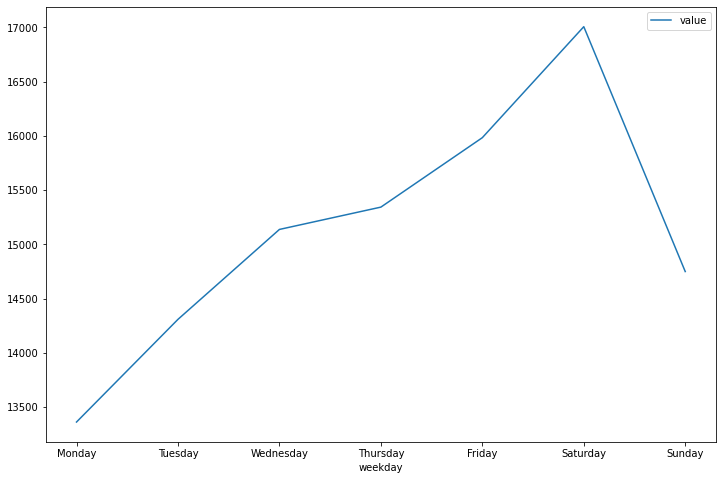

In [42]:
# Plotando agora por da da semana

df[['value','weekday']].groupby('weekday').mean().plot() ;
# O pico esta no sabado com 17.000 em média

In [41]:
df[['value','weekday']].groupby('weekday').mean()

,value
weekday,
Monday,13362.086111
Tuesday,14308.778898
Wednesday,15137.875672
Thursday,15343.679435
Friday,15983.970430
Saturday,17007.264785
Sunday,14749.539583


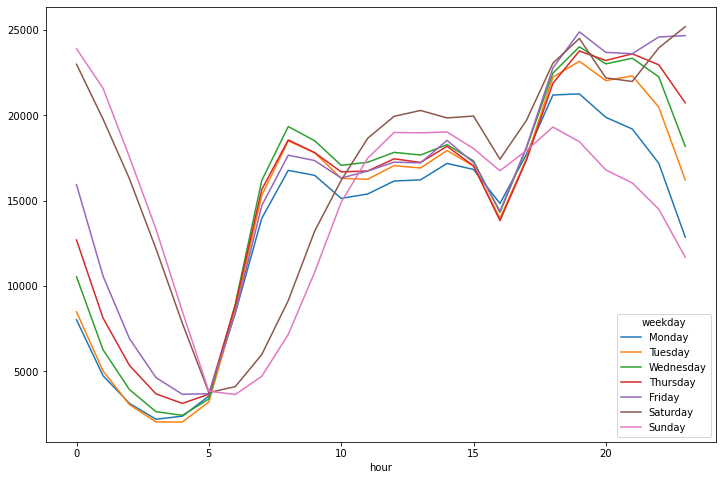

In [47]:
# Queremos ver a quantidade por hora e dia da semana
df.groupby(['hour','weekday']).mean()['value'].unstack().plot();

In [45]:
# Agregando com a média de dia e hora
df.join(df.groupby(['hour','weekday'])['value'].mean(),
       on = ['hour','weekday'], rsuffix = '_avg')

,timestamp,value,hour,weekday,value_avg
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065
...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968
5156,2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065
5157,2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935
5158,2015-01-31 22:00:00,26515.0,22,Saturday,23949.951613


In [48]:
df_final = df.join(df.groupby(['hour','weekday'])['value'].mean(),
       on = ['hour','weekday'], rsuffix = '_avg')
df_final

,timestamp,value,hour,weekday,value_avg
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065
...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968
5156,2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065
5157,2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935
5158,2015-01-31 22:00:00,26515.0,22,Saturday,23949.951613


In [51]:
# Transformando o timestamp em index
df_final.set_index('timestamp')

,value,hour,weekday,value_avg
timestamp,,,,
2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677
2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548
2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903
2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645
2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065
...,...,...,...,...
2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968
2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065
2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935


In [52]:
df_final['day'] = df.timestamp.dt.weekday
df_final

,timestamp,value,hour,weekday,value_avg,day
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677,1
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548,1
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903,1
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645,1
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065,1
...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968,5
5156,2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065,5
5157,2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935,5
5158,2015-01-31 22:00:00,26515.0,22,Saturday,23949.951613,5


### Model Isolation_forest
#### O IF é um modelo não supervisionado e detecta anomalias

In [53]:
# Vamos utilizar apenas as colunas de valor, hora e data no modelo

data = df_final[['value','hour','day']]

# Modelo Isolation Forest
model = IsolationForest(contamination = 0.005,  # A % de anomalias que desejamos considerar
                       max_features = 3,
                       max_samples=0.8,
                       n_estimators = 200)
model.fit(data)

IsolationForest(contamination=0.005, max_features=3, max_samples=0.8,
                n_estimators=200)

In [57]:
# Segregamos se igual a -1 então é outlier, senão não é
df_final['outliers'] = pd.Series(model.predict(data)).apply(lambda x: 'yes'if (x ==-1) else 'no')

In [60]:
df_final.query('outliers == "yes"')

# Dia: 2014-11-02 foi a maratona NYC
# Dia: 2014-11-27 foi Dia de Ação de Graças
# Dia: 2014-12-25 foi Natal
# Dia: 2015-01-01 foi a Ano Novo
# Dias: 2015-01-26 e 2015-01-27 houve Nevasca

,timestamp,value,hour,weekday,value_avg,day,outliers
1488,2014-09-01 00:00:00,13763.0,0,Monday,8020.283333,0,yes
1631,2014-09-06 23:00:00,29418.5,23,Saturday,25192.516129,5,yes
2640,2014-10-19 00:00:00,27146.5,0,Sunday,23898.733333,6,yes
2977,2014-11-02 01:00:00,37204.5,1,Sunday,21593.533333,6,yes
4271,2014-12-25 23:00:00,7977.5,23,Thursday,20732.241935,3,yes
4416,2015-01-01 00:00:00,25850.0,0,Thursday,12698.500000,3,yes
4417,2015-01-01 01:00:00,29292.0,1,Thursday,8132.564516,3,yes
4418,2015-01-01 02:00:00,25753.5,2,Thursday,5350.209677,3,yes
4419,2015-01-01 03:00:00,22067.0,3,Thursday,3683.177419,3,yes
4511,2015-01-04 23:00:00,8402.0,23,Sunday,11686.450000,6,yes


In [61]:
# Plotando os dados
fig = px.scatter(df_final, 
                x = 'timestamp',
                y = 'value',
                color = 'outliers',
                hover_data = ['weekday','hour','value_avg'],
                title = 'NYC Taxi')

fig.update_xaxes(
    rangeslider_visible = True,)
fig.show()

In [63]:
# Mostrando o Score de cada linha
score = model.decision_function(data)
score

array([0.09863797, 0.15208899, 0.16777178, ..., 0.15462945, 0.11840528,
       0.09891886])

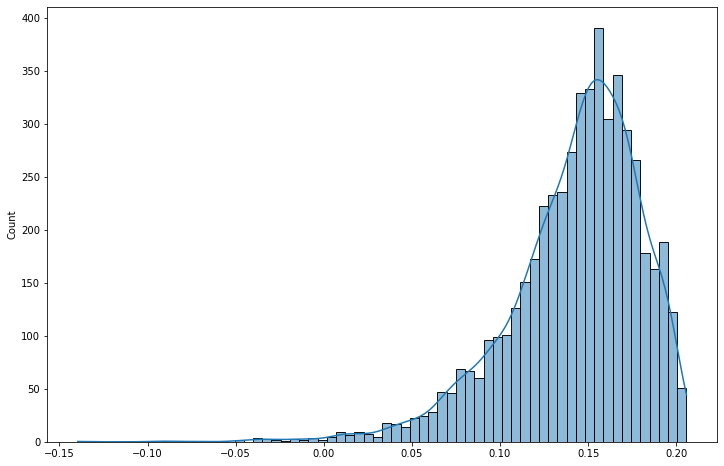

In [69]:
# Fazendo um histograma para entender a distribuição dos Scores
import seaborn as sns

sns.histplot( data = score, kde = True);

<AxesSubplot:>

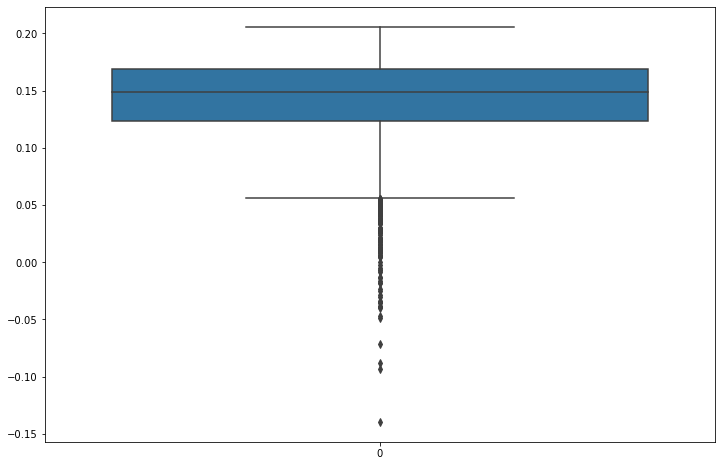

In [70]:
sns.boxplot( data = score) # Podemos ver que existe bastante outliers com score baixo

In [71]:
df_final['scores'] = score
df_final

,timestamp,value,hour,weekday,value_avg,day,outliers,scores
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677,1,no,0.098638
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548,1,no,0.152089
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903,1,no,0.167772
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645,1,no,0.171589
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065,1,no,0.171749
...,...,...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968,5,no,0.020939
5156,2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065,5,no,0.154106
5157,2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935,5,no,0.154629
5158,2015-01-31 22:00:00,26515.0,22,Saturday,23949.951613,5,no,0.118405


In [72]:
# Se score <= 0.02 então é anomalia

df_final.query('scores <= 0.02')

,timestamp,value,hour,weekday,value_avg,day,outliers,scores
120,2014-07-06 00:00:00,15021.0,0,Sunday,23898.733333,6,no,0.012782
312,2014-07-14 00:00:00,10760.5,0,Monday,8020.283333,0,no,0.009448
1488,2014-09-01 00:00:00,13763.0,0,Monday,8020.283333,0,yes,-0.025144
1489,2014-09-01 01:00:00,10045.0,1,Monday,4749.750000,0,no,0.005977
1511,2014-09-01 23:00:00,10366.0,23,Monday,12863.000000,0,no,0.018784
1631,2014-09-06 23:00:00,29418.5,23,Saturday,25192.516129,5,yes,-0.039244
2136,2014-09-28 00:00:00,26794.5,0,Sunday,23898.733333,6,no,0.010133
2640,2014-10-19 00:00:00,27146.5,0,Sunday,23898.733333,6,yes,-0.018154
2977,2014-11-02 01:00:00,37204.5,1,Sunday,21593.533333,6,yes,-0.139607
3503,2014-11-23 23:00:00,9844.0,23,Sunday,11686.450000,6,no,0.015337


<AxesSubplot:xlabel='weekday', ylabel='scores'>

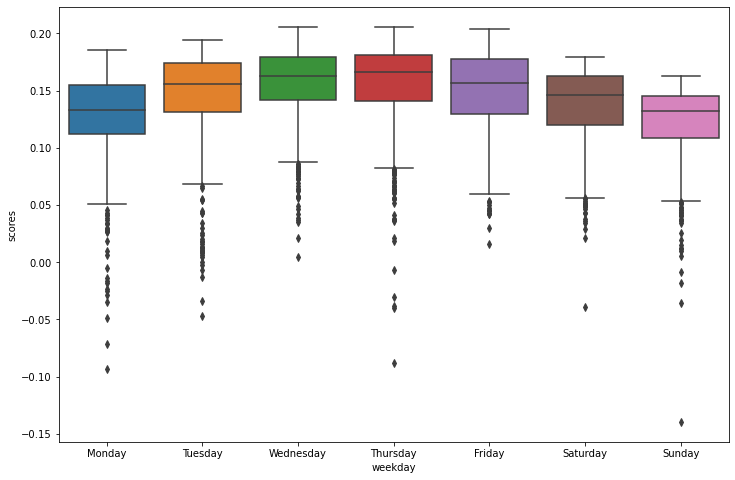

In [78]:
sns.boxplot( data = df_final,
           x = 'weekday',
           y = 'scores') # Podemos notar que na quinta e segunda existem Scores mais dispersos, podendo ocasionar mais outliers

<AxesSubplot:xlabel='hour', ylabel='scores'>

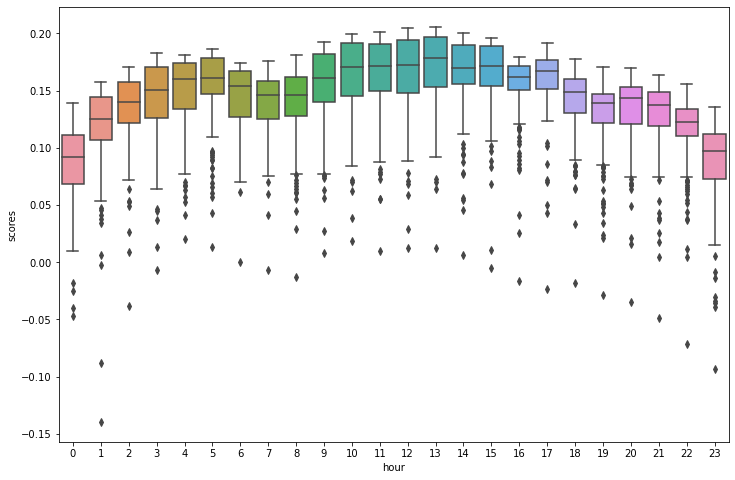

In [83]:
sns.boxplot( data = df_final,
           x = 'hour',
           y = 'scores') # Podemos notar que das 10h as 13h a média de Score aumenta